In [6]:
#load in plotting tools
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np

In [8]:
#load in mass spec data file.
df = pd.io.parsers.read_csv('massspec/proteinGroups20June19.txt',sep='\t')

In [9]:
#set the plotting style
def pboc_style_mpl():
    """
    Formats matplotlib plotting enviroment to that used in
    Physical Biology of the Cell, 2nd edition.
    """
    rc = {'lines.linewidth': 1.25,
          'axes.labelsize': 8,
          'axes.titlesize': 9,
          'axes.facecolor': '#E3DCD0',
          'xtick.labelsize': 7,
          'ytick.labelsize': 7,
          'font.family': 'Lucida Sans Unicode',
          'grid.linestyle': '-',
          'grid.linewidth': 0.5,
          'grid.color': '#ffffff',
          'legend.fontsize': 8,
          'figure.dpi': 300,
          'savefig.dpi': 300}
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=-1)
    plt.rc('ytick.major', pad=-1)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[3.5, 2.5])
    plt.rc('svg', fonttype='none')
    plt.rc('legend', title_fontsize='8', frameon=True,
           facecolor='#E3DCD0', framealpha=1)
    sns.set_style('darkgrid', rc=rc)
    sns.set_palette("colorblind", color_codes=True)
    sns.set_context('notebook', rc=rc)
pboc_style_mpl()

In [22]:
#set the column name that contains the normal
inname = 'A5'
good_column = 'Ratio H/L normalized ' + inname
#extract the only necessary columns, protein name and normalized ratio
enrichment = df[['Protein names',good_column]]

In [23]:
#remove any rows which don't actually have ratios (those proteins where we did not find enough peptides
#will have an np.NaN for enrichment)
enrichment2 = enrichment.dropna()

In [24]:
#sort the entries so that they go from highest enrichment to lowest.
enrichment2 = enrichment2.sort_values(by=good_column,ascending=False)

In [25]:
def check_DNA(s):
    '''This function will return only those proteins which have DNA binding activity.'''
    with open('massspec/DNAbinding_genenames.txt') as f:
        genenames = f.read()
        genenames = genenames.split(',')
    if s in genenames:
        return True
    else:
        return False

In [26]:
#filter for only proteins that bind DNA.
goodrows = enrichment2['Protein names'].apply(check_DNA)
enrichment3 = enrichment2[goodrows]

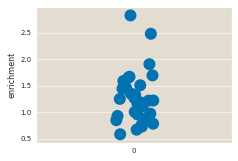

In [27]:
#plot results
fig,ax = plt.subplots()
ax.set_xlabel('')
ax.set_ylabel('enrichment')
sns.stripplot(data= list(enrichment3[good_column]),jitter=True,size=12)
plt.savefig(inname + '_output.eps',format='eps')
